In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
tf.__version__

'2.17.0'

[1.64634959 0.9970408  1.74752046 ... 0.59195509 6.05827023 1.0557563 ]


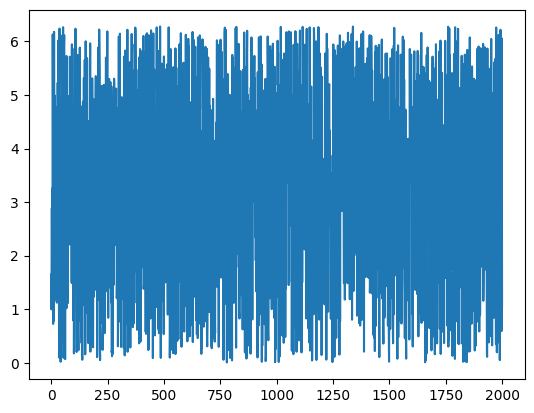

In [5]:
SAMPLES = 2000
seed = 1337
np.random.seed(seed)
tf.random.set_seed(seed)
x_values = np.random.uniform(low=0, high= 2*math.pi, size= SAMPLES)
plt.plot(x_values)
print(x_values)

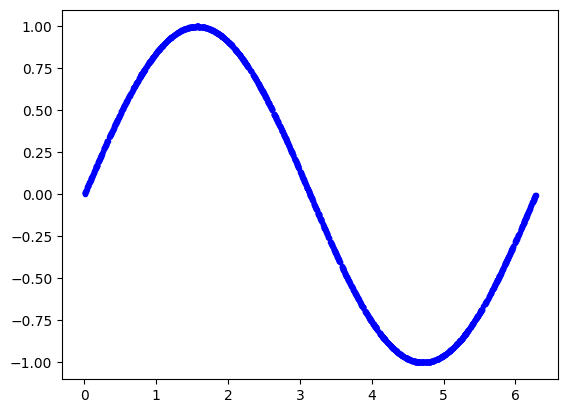

In [8]:
np.random.shuffle(x_values)
y_values= np.sin(x_values)
plt.plot(x_values, y_values, 'b.')

In [23]:
y_values += 0.1*np.random.randn(*y_values.shape)

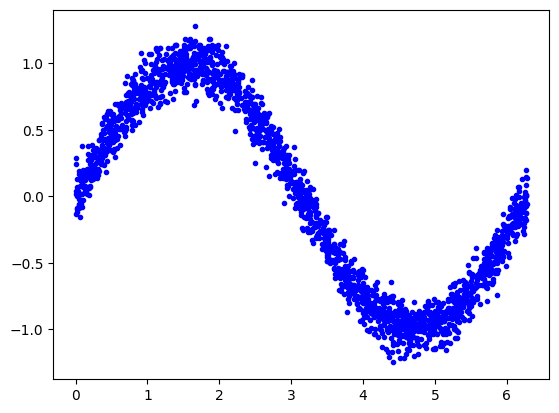

In [25]:
plt.plot(x_values, y_values, 'b.')

In [26]:
train_ds=int(0.6*SAMPLES)
test_ds = int(0.2*SAMPLES + train_ds)
x_train, x_validate, x_test = np.split(x_values,[train_ds,test_ds])
y_train, y_validate, y_test = np.split(y_values, [train_ds,test_ds])
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

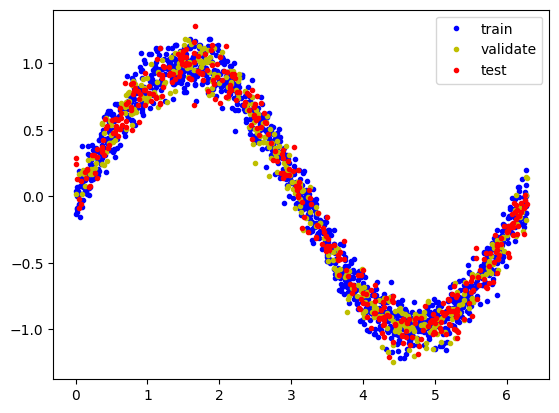

In [27]:
plt.plot(x_train, y_train, 'b.', label='train')
plt.plot(x_validate, y_validate, 'y.', label='validate')
plt.plot(x_test, y_test, 'r.', label='test')
plt.legend()


#Modelling

In [30]:
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(x_train, y_train, epochs=600, batch_size=16,
                     validation_data=(x_validate, y_validate))

Epoch 1/600
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4714 - mae: 0.5957 - val_loss: 0.3156 - val_mae: 0.4915
Epoch 2/600
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2929 - mae: 0.4669 - val_loss: 0.2278 - val_mae: 0.4179
Epoch 3/600
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2141 - mae: 0.4007 - val_loss: 0.1846 - val_mae: 0.3706
Epoch 4/600
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1770 - mae: 0.3581 - val_loss: 0.1681 - val_mae: 0.3448
Epoch 5/600
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1630 - mae: 0.3351 - val_loss: 0.1622 - val_mae: 0.3319
Epoch 6/600
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1578 - mae: 0.3233 - val_loss: 0.1598 - val_mae: 0.3250
Epoch 7/600
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1556 - mae: 0.3165 - val_loss: 0.1589 - val_mae: 0.3210
Epoch 8/600
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1546 - mae: 0.3128 - val_loss: 0.1585 - val_mae: 0.3186
Epoch 9/600
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.154

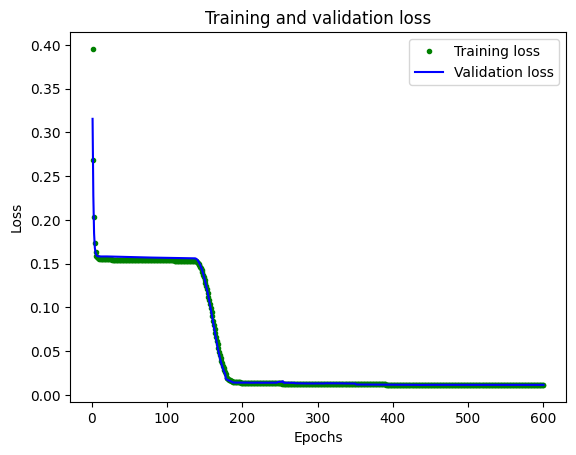

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0119 - mae: 0.0853  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


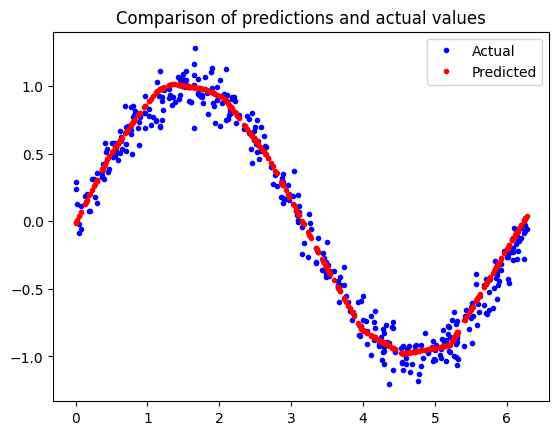

In [33]:
loss = model.evaluate(x_test, y_test)
predictions = model.predict(x_test)

plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

#Convrting Model for Microcontroller

In [34]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpcrwetiph'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137541989997152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137541989999616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137541996316976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137541990319200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137541990005600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137541990003312: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [39]:
# open("/content/drive/MyDrive/Embedded_ML_Assignment_2/conv_model.tflite", "wb").write(tflite_model)

3152

In [42]:
#with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_dataset_generator():
  for value in x_test:
    yield [np.array(value, dtype=np.float32, ndmin=2)]

converter.representative_dataset = representative_dataset_generator
tflite_model_quantized = converter.convert()

Saved artifact at '/tmp/tmp3_bsd7dg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137541989997152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137541989999616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137541996316976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137541990319200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137541990005600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137541990003312: TensorSpec(shape=(), dtype=tf.resource, name=None)


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:983: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [43]:
# open("/content/drive/MyDrive/Embedded_ML_Assignment_2/quant_model.tflite", "wb").write(tflite_model_quantized)

3768

In [45]:
sine_model = tf.lite.Interpreter('/content/drive/MyDrive/Embedded_ML_Assignment_2/conv_model.tflite')
sine_model_quantized = tf.lite.Interpreter('/content/drive/MyDrive/Embedded_ML_Assignment_2/quant_model.tflite')

sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

sine_model_predictions = []
sine_model_quantized_predictions = []

for x_value in x_test:
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  sine_model.invoke()
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])
  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(
      sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

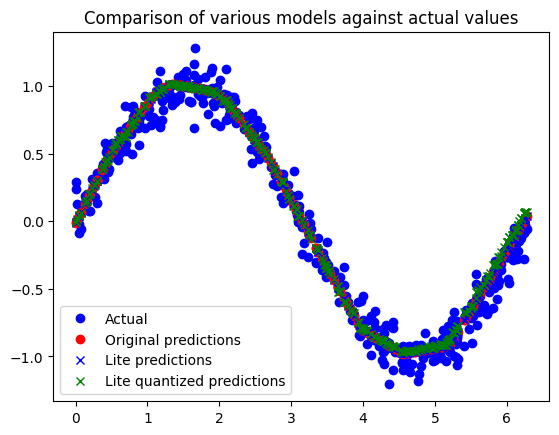

In [47]:
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx',label='Lite quantized predictions')
plt.legend()
plt.show()

In [49]:
!apt-get -qq install xxd

In [51]:
!xxd -i /content/drive/MyDrive/Embedded_ML_Assignment_2/quant_model.tflite > /content/drive/MyDrive/Embedded_ML_Assignment_2/sine_model_quantized.cc

!cat /content/drive/MyDrive/Embedded_ML_Assignment_2/sine_model_quantized.cc

unsigned char _content_drive_MyDrive_Embedded_ML_Assignment_2_quant_model_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x8c, 0x00, 0x00, 0x00, 0x0c, 0x01, 0x00, 0x00,
  0x00, 0x04, 0x00, 0x00, 0x10, 0x04, 0x00, 0x00, 0x2c, 0x0e, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xae, 0xfb, 0xff, 0xff, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x3c, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76,
  0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x68, 0xff, 0xff, 0xff,
  0x0b, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x6f, 0x75, 0x74, 0x70, 0x75, 0x74, 0x5f, 0x30, 0x00, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00,